# Векторные модели. Word2Vec

## Кратко о существующих системах

**GloVe**

GloVe берет и строит полную матрицу совместной встречаемости и после этого с помощью алгоритмов уменьшения размерности преобразует ее так, чтобы вектора были опредленной длины


**Word2Vec**

Это уже нейросеть и она на основе корпуса постепенно подбирает коэффициенты (значения в векторах) для каждого слова так, чтобы с помощью них можно было наилучшим образом предсказывать слова по контексту

**FastText**

Если мы берем конкретные слова, мы не можем ничего сказать о тех, что нам не встретились (например, уже видели вагон и строитель, а вот вагоностроителя у нас не было). Если мы возьмем слова не целиком, а в виде будквенных нграмм, то мы сможем сложить неизвестные слова.

**AdaGram**

Все предыдущие модели основаны на графических оболочках и не учитывают многозначность и омонимию. Есть только один вектор для слова "ключ" и мы ничего с этим не можем сделать. AdaGram исходит из предположения, что у слова есть n вариантов и если они действительно отличаются и достаточно часто встречаются, он умеет их разделить.

**BERT и ELMo**

Эти модели не просто могут отличить значения слов, о и скорректировать их вектора в зависимости от контекста, например, понять, что в отрывках “чистый ключ в лесной чаще” и “ключ от квартиры” совсем разные “ключи”. 

### Word2Vec

Одной из самых известных моделей для работы с дистрибутивной семантикой является word2vec. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов (сейчас работает в Facebook). Вот две самые главные статьи:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

Полученные таким образом вектора называются распределенными представлениями слов, или **эмбеддингами**.

#### Как это обучается?

Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).

+ **CBOW** предсказывает текущее слово, исходя из окружающего его контекста.

+ **Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова.

#### Как это работает?

Word2vec принимает большой текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор, выдавая координаты слов на выходе. Сначала он создает словарь, «обучаясь» на входных текстовых данных, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное расстояние между их векторами.

С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии) и решать примеры:

+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

Ещё про механику с картинками [тут](https://habr.com/ru/post/446530/)

#### Зачем это нужно?

+ используется для решения семантических задач
+ давайте подумаем, для описания каких семантических классов слов дистрибутивная информация особенно важна?
+ несколько интересных статей по дистрибутивной семантике:

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

+ подаётся на вход нейронным сетям
+ используется в Siri, Google Assistant, Alexa, Google Translate...

#### Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html). Вообще-то `gensim` — библиотека для тематического моделирования текстов, но один из компонентов в ней — реализация на python алгоритмов из библиотеки word2vec (которая в оригинале была написана на C++).

Если gensim у вас не стоит, то ставим: `pip install gensim`. Можно сделать это прямо из jupyter'а! Чтобы выполнить какую-то команду не в питоне, в командной строке, нужно написать перед ней восклицательный знак.


In [1]:
import re
import gensim
import logging

import pandas as pd


from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

#### Как обучить свою модель

NB! Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

Поскольку иногда тренировка модели занимает много времени, то можно ещё вести лог событий, чтобы понимать, что на каком этапе происходит.

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

На вход модели даем текстовый файл, каждое предложение на отдельной строчке. Вот игрушечный пример с текстом «Бедной Лизы». Он заранее очищен от пунктуации, приведен к нижнему регистру и лемматизирован.

In [3]:
f = 'liza_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
+ sample — порог для downsampling'a высокочастотных слов,
+ workers — количество потоков,
+ alpha — learning rate,
+ iter — количество итераций,
+ max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [4]:
%time model_liza = gensim.models.Word2Vec(data, size=300, window=5, min_count=2, iter=20)

2020-04-22 16:03:06,074 : INFO : collecting all words and their counts
2020-04-22 16:03:06,078 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-22 16:03:06,081 : INFO : collected 1213 word types from a corpus of 3109 raw words and 392 sentences
2020-04-22 16:03:06,082 : INFO : Loading a fresh vocabulary
2020-04-22 16:03:06,084 : INFO : effective_min_count=2 retains 478 unique words (39% of original 1213, drops 735)
2020-04-22 16:03:06,084 : INFO : effective_min_count=2 leaves 2374 word corpus (76% of original 3109, drops 735)
2020-04-22 16:03:06,086 : INFO : deleting the raw counts dictionary of 1213 items
2020-04-22 16:03:06,087 : INFO : sample=0.001 downsamples 83 most-common words
2020-04-22 16:03:06,088 : INFO : downsampling leaves estimated 1817 word corpus (76.6% of prior 2374)
2020-04-22 16:03:06,090 : INFO : estimated required memory for 478 words and 300 dimensions: 1386200 bytes
2020-04-22 16:03:06,091 : INFO : resetting layer weights
2020-04

2020-04-22 16:03:06,314 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-22 16:03:06,315 : INFO : EPOCH - 18 : training on 3109 raw words (1810 effective words) took 0.0s, 210441 effective words/s
2020-04-22 16:03:06,321 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-22 16:03:06,322 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-22 16:03:06,325 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-22 16:03:06,326 : INFO : EPOCH - 19 : training on 3109 raw words (1795 effective words) took 0.0s, 201427 effective words/s
2020-04-22 16:03:06,332 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-22 16:03:06,333 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-22 16:03:06,337 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-22 16:03:06,337 : INFO : EPOCH - 20 : training on 3109 raw words (1840 effective words) too

Wall time: 265 ms


Можно нормализовать вектора, тогда модель будет занимать меньше RAM. Однако после этого её нельзя дотренировывать. Здесь используется L2-нормализация: вектора нормализуются так, что если сложить квадраты всех элементов вектора, в сумме получится 1.

In [5]:
model_liza.init_sims(replace=True)
model_path = "liza.bin"

print("Saving model...")
model_liza.wv.save_word2vec_format(model_path, binary=True)

2020-04-22 16:03:20,703 : INFO : precomputing L2-norms of word weight vectors
2020-04-22 16:03:20,736 : INFO : storing 478x300 projection weights into liza.bin


Saving model...


Смотрим, сколько в модели слов:

In [6]:
print(len(model_liza.wv.vocab))

478


In [7]:
print(sorted([w for w in model_liza.wv.vocab]))

['анюта', 'армия', 'ах', 'барин', 'бедный', 'белый', 'берег', 'березовый', 'беречь', 'бесчисленный', 'благодарить', 'бледный', 'блеснуть', 'блестящий', 'близ', 'бог', 'богатый', 'большой', 'бояться', 'брать', 'бросать', 'бросаться', 'бывать', 'быть', 'важный', 'ввечеру', 'вдова', 'велеть', 'великий', 'великолепный', 'верить', 'верно', 'весело', 'веселый', 'весна', 'вести', 'весь', 'весьма', 'ветвь', 'ветер', 'вечер', 'взглядывать', 'вздох', 'вздыхать', 'взор', 'взять', 'вид', 'видеть', 'видеться', 'видный', 'вместе', 'вода', 'возвращаться', 'воздух', 'война', 'воображать', 'воображение', 'воспоминание', 'восторг', 'восхищаться', 'время', 'все', 'вслед', 'вставать', 'встречаться', 'всякий', 'высокий', 'выть', 'выходить', 'глаз', 'глубокий', 'гнать', 'говорить', 'год', 'голос', 'гора', 'горе', 'горестный', 'горлица', 'город', 'горький', 'господь', 'гром', 'грусть', 'давать', 'давно', 'далее', 'дверь', 'движение', 'двор', 'девушка', 'дело', 'день', 'деньги', 'деревня', 'деревянный', 'деся

И чему же мы ее научили? Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [8]:
model_liza.wv.most_similar(positive=["смерть", "любовь"], negative=["печальный"], topn=1)

[('который', 0.991159975528717)]

In [9]:
model_liza.wv.most_similar("любовь", topn=3)

[('свой', 0.9978910088539124),
 ('лиза', 0.997712254524231),
 ('который', 0.9976661801338196)]

In [10]:
model_liza.wv.similarity("лиза", "эраст")

0.9976062

In [11]:
model_liza.wv.similarity("лиза", "лиза")

1.0

In [12]:
model_liza.wv.doesnt_match("скорбь грусть слеза улыбка".split())

'улыбка'

In [13]:
model_liza.wv.words_closer_than("лиза", "эраст")

['свой',
 'который',
 'мочь',
 'сказать',
 'сей',
 'хотеть',
 'один',
 'смотреть',
 'любовь']

#### Параметры варьирования

1) препроцессинг -- лемматизировать или нет

2) размер корпуса -- чем больше, тем лучше, но! не для семантических задач -- для них важнее качество

3) размер словаря

4) negative samples

5) количество итераций

6) длина вектора -- 100-300 (судя по всему, >300 не сильно улучшает результаты)

7) длина окна -- для синтаксических задач, примерно 4, для семантических задач, большое окно, 8, 10.

Хорошая статья про сравнение моделей с варьированием параметров: https://www.aclweb.org/anthology/D14-1162.pdf

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятором семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

Ещё давайте посмотрим на векторные романы https://nevmenandr.github.io/novel2vec/

#### Работа с моделью

Модели word2vec бывают разных форматов:

+ .vec.gz — обычный файл
+ .bin.gz — бинарник

Загружаются они с помощью одного и того же гласса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`.

Если же эмбеддинги обучены не с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. для загрузки предобученных эмбеддингов `glove`, `fasttext`, `bpe` и любых других нужна именно она.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г.

In [3]:
#urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0xb9d3128>)

In [17]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2020-04-22 16:13:55,697 : INFO : loading projection weights from ruscorpora_mystem_cbow_300_2_2015.bin.gz
2020-04-22 16:14:04,943 : INFO : loaded (281776, 300) matrix from ruscorpora_mystem_cbow_300_2_2015.bin.gz


In [16]:
m2 = 'tayga_upos_skipgram_300_2_2019.bin'
model2 = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

2020-04-22 16:13:47,661 : INFO : loading projection weights from tayga_upos_skipgram_300_2_2019.bin
2020-04-22 16:13:52,329 : INFO : loaded (249565, 300) matrix from tayga_upos_skipgram_300_2_2019.bin


In [18]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']

In [31]:
words2 = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ', 'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']

Частеречные тэги нужны, поскольку это специфика скачанной модели - она была натренирована на словах, аннотированных их частями речи (и лемматизированных). NB! В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [ ]:
for word in words:
    # есть ли слово в модели? 
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

(в качестве эксперемента сравним результаты двух моделей)

In [36]:
for word in zip(words, words2):
    # есть ли слово в модели? 
    if word[0] in model and word[1] in model2:
        print(word[0].split('_')[0])
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        #print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        mod1 = model.most_similar(positive=[word[0]], topn=5)
        mod2 = model2.most_similar(positive=[word[1]], topn=5)
        for i, ii in zip(mod1, mod2):
            # слово + коэффициент косинусной близости
            print(f'{i[0]}\t\t{i[1]}\tvs\t{ii[0]}\t{ii[1]}')
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в одной из моделей!' % word)

хороший
плохой_A		0.7463521361351013	vs	хо-роший_ADJ	0.7090424299240112
неплохой_A		0.6708559989929199	vs	плохой_ADJ	0.7054268717765808
отличный_A		0.663343608379364	vs	хороший_ADV	0.6968570947647095
превосходный_A		0.6079519391059875	vs	неплохой_ADJ	0.6804025769233704
замечательный_A		0.586450457572937	vs	отличный_ADJ	0.6720600128173828


плохой
хороший_A		0.7463521361351013	vs	плохой_NOUN	0.7729244828224182
дурной_A		0.6186875104904175	vs	плохой_ADV	0.7225555181503296
скверный_A		0.6014161705970764	vs	хороший_ADJ	0.7054268717765808
отличный_A		0.5226833820343018	vs	плохо_ADJ	0.6851682662963867
посредственный_A		0.5061031579971313	vs	пло-хой_ADJ	0.6603251695632935


ужасный
страшный_A		0.8007251024246216	vs	жуткий_ADJ	0.8272484540939331
жуткий_A		0.6982529163360596	vs	страшный_ADJ	0.7970277070999146
отвратительный_A		0.6798903942108154	vs	ужаснейший_ADJ	0.7662500739097595
ужасающий_A		0.6174500584602356	vs	кошмарный_ADJ	0.7639416456222534
чудовищный_A		0.6100856065750122	vs	ужасающий_

Находим косинусную близость пары слов:

In [37]:
print(model.similarity('плохой_A', 'хороший_A'))
print(model2.similarity('плохой_ADJ', 'хороший_ADJ'))

0.7463521
0.70542693


In [39]:
print(model.similarity('плохой_A', 'синий_A'))
print(model2.similarity('плохой_ADJ', 'синий_ADJ'))

-0.12778337
0.037360884


In [40]:
print(model.similarity('ужасный_A', 'жуткий_A'))
print(model2.similarity('ужасный_ADJ', 'жуткий_ADJ'))

0.69825286
0.82724845


Пропорция

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [41]:
print(model.most_similar(positive=['плохой_A', 'ужасный_A'], negative=['хороший_A'])[0][0])
print(model2.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])[0][0])

страшный_A
жуткий_ADJ


Найди лишнее!

In [42]:
print(model.doesnt_match('плохой_A хороший_A ужасный_A страшный_A'.split()))
print(model2.doesnt_match('плохой_ADJ хороший_ADJ ужасный_ADJ страшный_ADJ'.split()))

хороший_A
хороший_ADJ


Проверим идею из компонентного анализа о том, что `ужасно - плохой = степень`

In [11]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_A']):
    print(f'{score:.4}\t{word}')

0.5575	безумно_ADV
0.4791	безмерно_ADV
0.4536	жутко_ADV
0.4472	невероятно_ADV
0.4394	очень_ADV
0.4364	чертовски_ADV
0.4231	страшно_ADV
0.4124	необычайно_ADV
0.4119	нестерпимо_ADV
0.4005	необыкновенно_ADV


In [43]:
for word, score in model2.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ']):
    print(f'{score:.4}\t{word}')

0.573	жутко_ADV
0.5351	жуткий_ADV
0.5218	безумно_ADV
0.5154	неимоверно_ADV
0.4988	страшно_ADV
0.485	невероятно_ADV
0.4714	жутко_NOUN
0.4307	адски_ADV
0.4301	нестерпимо_ADV
0.4228	жутко_ADJ


Работает!

#### Оценка

Это, конечно, хорошо, но как понять, какая модель лучше? Или вот, например, я сделал свою модель, а как понять, насколько она хорошая?

Для этого существуют специальные датасеты для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии (про Россию и пельмени), а второй используется для оценки коэффициента семантической близости.

#### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с \"представлениями\" людей.

| слово 1    | слово 2    | близость |
|------------|------------|----------|
| кошка      | собака     | 0.7      | 
| чашка      | кружка     | 0.9      | 

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния о слова.

#### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификатор мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Датасет будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     | 
|------------|------------|---------------|
| Россия     | Москва     | страна-столица| 
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия) хотим получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой.

Датасеты для русского языка можно скачать на странице с моделями на RusVectores. Посчитаем качество нашей модели НКРЯ на датасете про аналогии:

In [45]:
res = model.accuracy('ru_analogy_tagged.txt')

2020-04-22 16:32:06,071 : INFO : capital-common-countries: 19.0% (58/306)
2020-04-22 16:32:08,176 : INFO : capital-world: 10.1% (52/515)
2020-04-22 16:32:08,722 : INFO : currency: 4.6% (6/130)
2020-04-22 16:32:09,987 : INFO : family: 71.2% (218/306)
2020-04-22 16:32:13,262 : INFO : gram1-Aective-to-adverb: 18.7% (152/812)
2020-04-22 16:32:14,806 : INFO : gram2-opposite: 32.1% (122/380)
2020-04-22 16:32:18,483 : INFO : gram6-nationality-Aective: 32.3% (293/907)
2020-04-22 16:32:18,484 : INFO : total: 26.8% (901/3356)


Результат устроен так:
```
[{'section': 'capital-common-countries', 'correct': [], 'incorrect': []},
 {'section': 'capital-world', 'correct': [], 'incorrect': []},
 {'section': 'currency', 'correct': [], 'incorrect': []},
 {'section': 'city-in-state', 'correct': [], 'incorrect': []},
 {'section': 'family', 'correct': [], 'incorrect': []},
 {'section': 'gram1-Aective-to-adverb', 'correct': [], 'incorrect': []},
 {'section': 'gram2-opposite', 'correct': [], 'incorrect': []},
 {'section': 'gram6-nationality-Aective', 'correct': [], 'incorrect': []},
 {'section': 'total', 'correct': [], 'incorrect': []}]
 ```
 
 Посмотрим на раздел `family`

In [46]:
for row in res[4]['incorrect'][:10]:
    print('\t'.join(row))

МАЛЬЧИК_S	ДЕВОЧКА_S	ДЕД_S	БАБКА_S
МАЛЬЧИК_S	ДЕВОЧКА_S	КОРОЛЬ_S	КОРОЛЕВА_S
МАЛЬЧИК_S	ДЕВОЧКА_S	ПРИНЦ_S	ПРИНЦЕССА_S
МАЛЬЧИК_S	ДЕВОЧКА_S	ОТЧИМ_S	МАЧЕХА_S
МАЛЬЧИК_S	ДЕВОЧКА_S	ПАСЫНОК_S	ПАДЧЕРИЦА_S
БРАТ_S	СЕСТРА_S	ДЕД_S	БАБКА_S
БРАТ_S	СЕСТРА_S	ОТЧИМ_S	МАЧЕХА_S
БРАТ_S	СЕСТРА_S	ПАСЫНОК_S	ПАДЧЕРИЦА_S
ПАПА_S	МАМА_S	ДЕД_S	БАБКА_S
ПАПА_S	МАМА_S	ОТЧИМ_S	МАЧЕХА_S


In [52]:
res2 = model2.accuracy('ru_analogy_tagged_upos.txt')

2020-04-22 16:37:30,061 : INFO : currency: 100.0% (6/6)
2020-04-22 16:37:31,198 : INFO : family: 83.1% (226/272)
2020-04-22 16:37:32,552 : INFO : gram2-opposite: 45.6% (156/342)
2020-04-22 16:37:32,572 : INFO : gram6-nationality-Aective: 0.0% (0/2)
2020-04-22 16:37:32,573 : INFO : total: 62.4% (388/622)


In [53]:
for row in res2[4]['incorrect'][:10]:
    print('\t'.join(row))

МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ДЕД_NOUN	БАБКА_NOUN
МАЛЬЧИК_NOUN	ДЕВОЧКА_NOUN	ОТЧИМ_NOUN	МАЧЕХА_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	ДЕД_NOUN	БАБКА_NOUN
БРАТ_NOUN	СЕСТРА_NOUN	ОТЧИМ_NOUN	МАЧЕХА_NOUN
ПАПА_NOUN	МАМА_NOUN	ДЕД_NOUN	БАБКА_NOUN
ПАПА_NOUN	МАМА_NOUN	ОТЧИМ_NOUN	МАЧЕХА_NOUN
ДЕД_NOUN	БАБКА_NOUN	КОРОЛЬ_NOUN	КОРОЛЕВА_NOUN
ДЕД_NOUN	БАБКА_NOUN	ОТЧИМ_NOUN	МАЧЕХА_NOUN
ДЕДУШКА_NOUN	БАБУШКА_NOUN	МУЖ_NOUN	ЖЕНА_NOUN
ДЕДУШКА_NOUN	БАБУШКА_NOUN	ТЕСТЬ_NOUN	ТЕЩА_NOUN


**Визуализация**

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']
X = model[words]

На списке конкретных слов

In [71]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

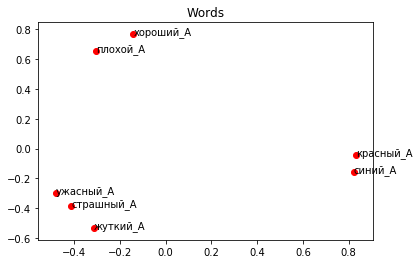

In [72]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

На все словах в модели

In [73]:
pca = PCA(n_components=2)
pca.fit(model[list(model.vocab)])
coords = pca.transform(model[words])

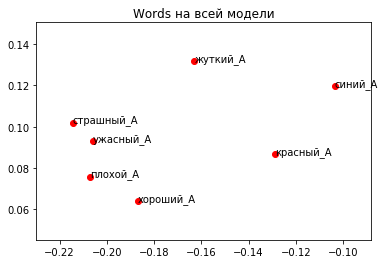

In [74]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words на всей модели')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Вторая модель:

In [75]:
X2 = model2[words2]
coords2 = pca.fit_transform(X2)

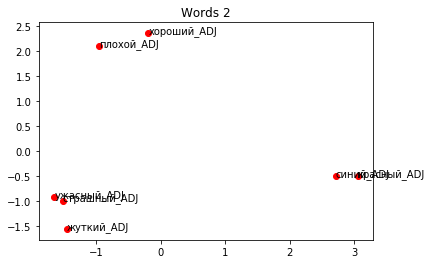

In [76]:
plt.scatter(coords2[:, 0], coords2[:, 1], color='red')
plt.title('Words 2')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords2[i, 0], coords2[i, 1]))
plt.show()

In [77]:
pca.fit(model2[list(model2.vocab)])
coords3 = pca.transform(model2[words2])

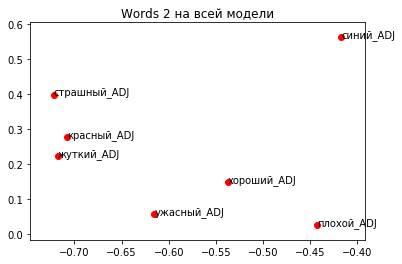

In [78]:
plt.scatter(coords3[:, 0], coords3[:, 1], color='red')
plt.title('Words 2 на всей модели')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords3[i, 0], coords3[i, 1]))
plt.show()

### Дальше: кластеризация

# Задание

1. Найдите по 5 ближайших слов к словам "город", "деревня", "спорт", "бизнес", "Россия", "происшествие", "река", "озеро", "море", "горы", "депутат", "врач", "север", "юг", "Кавказ", "Сибирь", "газпром", название своего родного города... Учтите, что слова может не быть в модели!


2. Посчитайте семантическую близкость слов "театр" и "кино", "Владивосток" и "Москва", "церковь" и "государство", "культура" и "отдых", "преступление" и "наказание". Можете придумать свои пары слов.


3. Решите примеры (можно придумать свои):
 * москва + екатеринбург - собянин
 * спартак - москва + санкт-петербург
 * иркутск - байкал + сочи
 * татарстан - татарский + бурятия
 * чай - лимон + кофе
 * авиакомпания - аэрофлот + ржд
 
 
4. Найдите лишнее, попробуйте интерпретировать результаты
 * магазин, супермаркет, рынок, тц
 * теннис, хоккей, футбол, дзюдо
 * кошка, собака, попугай, кролик
 * коми, дагестан, башкирия, камчатка

Если нужны ответы, пишите в тг @Polyana_A